# <font color='green'>Lecture 07 - ContiniousTime Markov Chains(CTMC)</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2024<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
</div>


***

# <span style="color:purple">Importing Required Packages</span>

In [1]:
from scipy.integrate import odeint
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import random

# <span style="color:purple" size="16">Continuous time markov chain</span>

<b>Slide #2 : Definition of a CTMC</br>

*   For the continuous-time Markov chain {X(t) : t≥ 0} with N states, the Markov property can be written as

*  $P[X(s + t) = j | X(s) = i, X(u)=x(u), 0 ≤ u < s ]=
P[X(s + t) = j | X(s) = i ], i, j ∈ S, 0 ≤ t < ∞$ ,
*   and reflects the fact that the future state at time s+t only depends on the current state at time s.

___________________________

In [7]:
example = '''
Consider a CTMC with three states: 0, 1, and 2. The transition rates between states are as follows:
- From state 0 to state 1: rate 2
- From state 1 to state 2: rate 3
- From state 2 to state 0: rate 1

This can be represented by the following transition rate matrix Q:

Q = [[-2,  2,  0],
     [ 0, -3,  3],
     [ 1,  0, -1]]
'''

print(example)


Consider a CTMC with three states: 0, 1, and 2. The transition rates between states are as follows:
- From state 0 to state 1: rate 2
- From state 1 to state 2: rate 3
- From state 2 to state 0: rate 1

This can be represented by the following transition rate matrix Q:

Q = [[-2,  2,  0],
     [ 0, -3,  3],
     [ 1,  0, -1]]



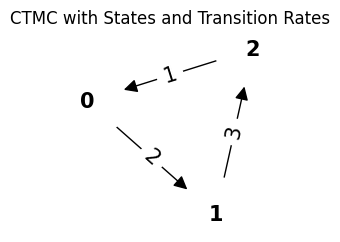

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the CTMC states and transition rates
states = [0, 1, 2]
transitions = [(0, 1, '2'), (1, 2, '3'), (2, 0, '1')]

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for state in states:
    G.add_node(state)

# Add edges with labels as transition rates
for (start, end, rate) in transitions:
    G.add_edge(start, end, label=rate)

# Define positions for a circular layout
pos = nx.spring_layout(G)

# Draw the nodes and edges
plt.figure(figsize=(2, 2))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='white', font_size=15, font_weight='bold', edge_color='black', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15, font_color='black')

# Set plot title
plt.title("CTMC with States and Transition Rates")
plt.axis('off')  # Turn off the axis
plt.show()


<b><span style="color:red">Slide #3: transition probabilities functions</span></br>



* We consider the special case of stationary transition probabilities functions (sometimes referred to as homogeneous transition probabilities functions), occurring when

   $P[X(s + t) = j | X(s) = i ]= P[X( t) = j | X(0) = i ]= Pi j (t)$

   for all states i and j and for all times s > 0 and t > 0;

* $P_{i j} (t)$ is called stationary transition probabilities
i.e. the independence of s characterizes the stationarity.
and

  $P(t) = [P_{i j} (t)]$
  is called the transition probability matrix function (TPMF).( a function of  time compared to TPM)

______________________________________________

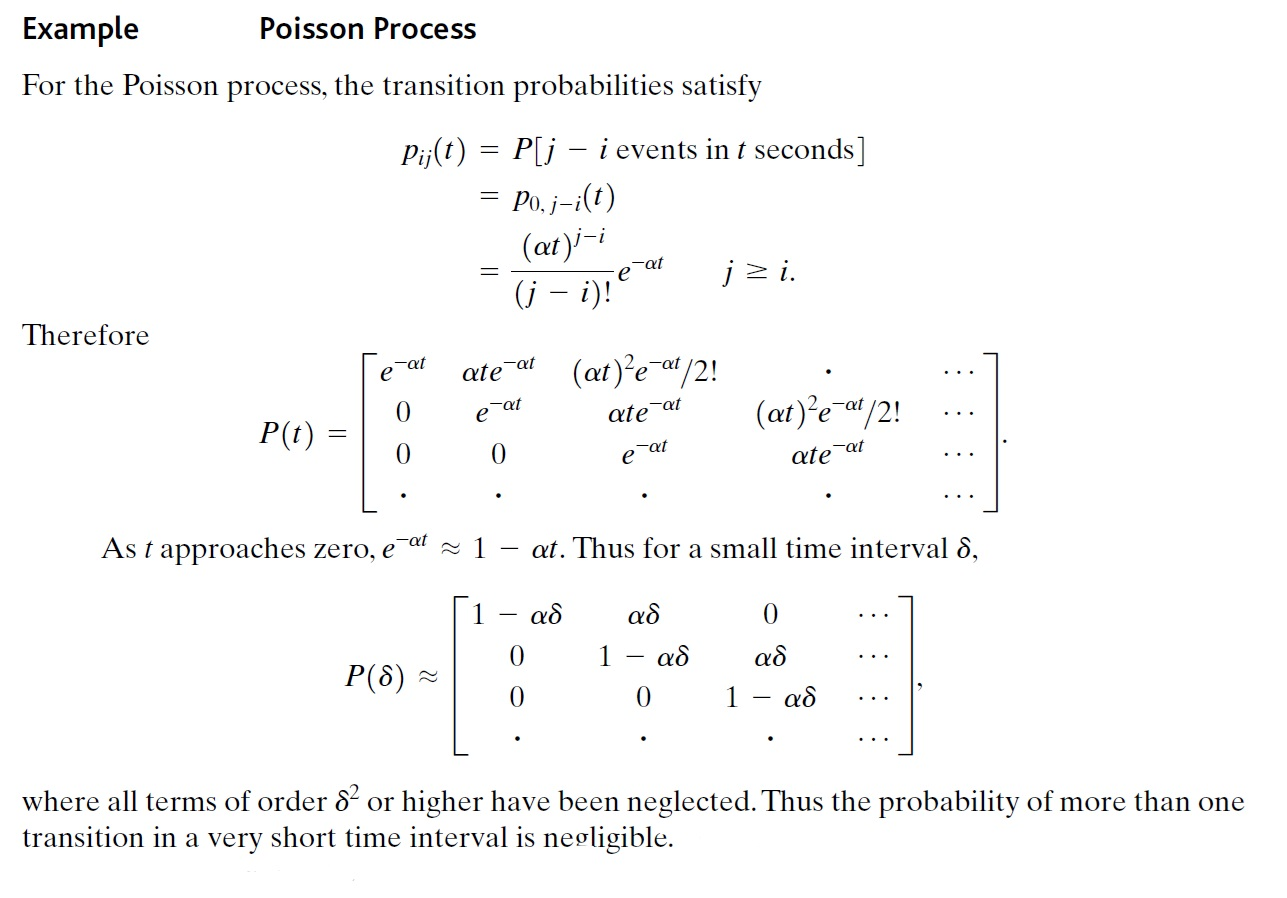

In [24]:

Image(filename=r"C:\Users\hp\Desktop\Template - Student\Template - Student\3.jpg")


In [22]:
import numpy as np
from scipy.special import factorial

def poisson_probability(lam, t, i, j):
    """
    Compute Poisson probability p_{j-i}(t) for a Poisson process.
    
    Parameters:
    lam (float): rate parameter (λ)
    t (float): time interval
    i (int): initial state
    j (int): final state
    
    Returns:
    float: Poisson probability p_{j-i}(t)
    """
    if j < i:
        return 0
    return (lam * t) ** (j - i) * np.exp(-lam * t) / factorial(j - i)

def transition_matrix(lam, delta, size=5):
    """
    Approximate the transition matrix P(δ) for a small time interval δ.
    
    Parameters:
    lam (float): rate parameter (λ)
    delta (float): small time interval δ
    size (int): size of the square matrix
    
    Returns:
    np.ndarray: transition matrix P(δ)
    """
    P = np.zeros((size, size))
    for i in range(size):
        for j in range(i, size):
            if j == i:
                P[i, j] = 1 - lam * delta
            elif j == i + 1:
                P[i, j] = lam * delta
            else:
                P[i, j] = 0
    return P

# Example usage:
lam = 0.5  # lambda rate parameter
delta = 0.1  # small time interval
size = 4  # size of the transition matrix

# Compute transition matrix for small delta
P_delta = transition_matrix(lam, delta, size)
print("Transition Matrix P(delta):")
print(P_delta)


Transition Matrix P(delta):
[[0.95 0.05 0.   0.  ]
 [0.   0.95 0.05 0.  ]
 [0.   0.   0.95 0.05]
 [0.   0.   0.   0.95]]


<b><span style="color:red">Slide #4: Behavior of a CTMC</span></br>
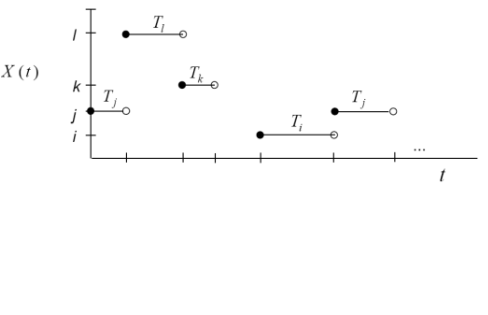
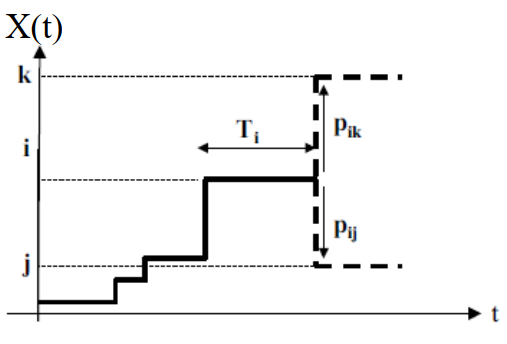

Two major components:


*   $T_i $= sojourn time in state i (random variable)
*   $p_{ij}$ = probability of moving to state j when leaving state i

_______________________________________________________________

<b> slide #5: Exponential holding time in states of CTMC</b>



*   Proposition:$T_i$ is exponentially distributed
*   Proof: By time homogeneity, we assume that the process starts out in state i. For $s\leq 0$ the event ${T_i > s}$ is equivalent to the event ${X(u) =
i for 0 \leq u \leq s}$.


*   Similarly, for s, t ≥ 0 the event ${T_i > s+t}$ is equivalent to the event ${X(u) = i for 0 \leq u \leq s + t}$


____________________________________________________________________________


In [4]:
def holding_exp(states, seed): 
  hold_time=[]
  for i in range(states):
    hold_time.append(random.expovariate(seed))
  return hold_time

In [5]:
holding_exp(10, 1.5)

[0.7069331080240017,
 0.013256546476798694,
 0.08647626006924342,
 0.0636933456543269,
 1.6827355631484913,
 0.9948668363709735,
 0.20034362590166344,
 0.1605427662575902,
 0.27447986290858334,
 0.5322716965481393]

<b> slide #6: Exponential holding time in states of CTMC</b>



*   Therefore

   $P(T_i >s+t |T_i >s)$

   $=  P(X(u) = i \ for 0 ≤ u ≤ s + t|X(u) = i for 0 ≤ u ≤ s)$

   $=P(X(u) = i \ for s < u ≤ s + t|X(u) = i for 0 ≤ u ≤ s)$

   $= P(X(u) = i \ for s < u ≤ s + t|X(s) = i)$

   $P(X(u) = i \ for 0 < u ≤ t|X(0) = i)$

   $= P(T_i > t)$,

_______________________________________________________________________________

<b> slide #7: Exponential holding time in states of CTMC</b>



*   Where

- the second equality follows from the simple fact that $P(A\cap B |A)=P(B|A)$ where we let $A = \{X(u) = i for 0 \leq u \leq s\} $ and $B=\{ X(u) = i for s < u \leq s + t\}$.

- the third equality follows from the Markov property.

- the fourth equality follows from time homogeneity.

Therefore, the distribution of $T_i$ has the memoryless property, which implies that it is exponential.

____________________________________________________________________________

<b> slide #8: Exponential holding time in states of CTMC</b>

$T_i \sim$ the waiting time for a change of state for a Markov process X(t), given that it is in state i at time 0. if $T_i>s$ then the process will be in the same state i at time $t_0+s$ as at $t_0$ and (being a Markov process) its subsequent behavior is independent of s. hence, 

$P\{T_i>st|T_i>s\} = P\{T_i>t \} \triangleq \varphi _i(t)$

represents the probability that the event $\{P (T_i > s + t)\} given \ that P \{T_i > s\}$.

But

$φ_i(t+s) = P\{T_i>s+t\} = P\{T_i>s+t, T_i>s \} = P\{T_i > s + t|T_i >s\} P\{T_i > s\}= \varphi_i(t)\varphi_i(s)$

Or
$log\varphi_i(t+s) = log\varphi_i(t)+log\varphi_i(s)$

The only function satisfies above is either of the form ct (c=cte) or unbounded form above. Thus

$log\varphi_i(t)=-\lambda_i(t)$   $ \varphi_i(t)=P\{T_i>t\}=e^{-\lambda_i(t)}$ , t>=0
_____________________________________________________________

<b> slide #9: Chapman-Kolmogorov equations<b>


*   Lemma 1. (Chapman-Kolmogorov equations) For
all $s \geq 0$ and $t \geq 0$, $P_{i,j}(s + t) =\sum_k P_{i,k}(s)P_{k,j}(t)$

*   Or in matrix notation P(s + t) = P(s)P(t)


*   Proof
*   We can compute $P_{i,j}(s + t)$ by considering all
    possible places the chain could be at time s.


*   We then condition and and uncondition, invoking the Markov property to simplify the conditioning;
 i.e.

 $P_{i,j}(s + t) = P(X(s + t) = j|X(0) = i)$

__________________________________________________________________





In [6]:
#recursive function (chapman-kolmogorov eq) for transition probabilities:
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)

In [7]:
pij = np.array([[.8, .2], [.6, .4]])

In [8]:
print("transition probability:")
rij(pij, 5)

transition probability:


array([[0.75008, 0.24992],
       [0.74976, 0.25024]])

<b> slide #10: Chapman-Kolmogorov equations<b>



*   Proof(cntd.)
  
  $ \sum _KP(X(s + t) = j,X(s) = k|X(0) = i)$

  $ = \sum_k P(X(s) = k|X(0) = i)P(X(s + t) = j|X(s) = k,X(0) = i)$

  (conditioning on X(s)=k)

  $= \sum_k  P(X(s) = k|X(0) = i)P(X(s + t) = j|X(s) = k)$

  (markov property) (uncondition) 

  $= \sum_k P_{i,k}(s)P_{k,j}(t)$ (stationary transition probabilities)

______________________________________________________________________________


<b>slide 11: Describing a CTMC


*   A CTMC is well specified if we specify:
*   (1) its initial probability distribution – p(X(0) = i) for all states i


*   (2) its transition probabilities - Pi,j(t) for all states i and j and positive times t
*   Thus we use these two elements to compute the distribution of X(t) for each t,

$P(X(t)=j) = \sum_iP(X(0)=i)P_{i,j}(t)$

_______________________________________________________________________



<b>slide 11: Describing a CTMC



*   Since the CTMC must be at any time in one of the N states, the analogous of DTMC is, for any state i

$\sum_{j=1}^N P_{i,j}(t) =1$
_____________________________________________________________________

<b>slide #13: constructing a CTMC model- four approaches(models)<b>



*   for all four models:

*   the initial distribution are required and thus we focus on specifying the model beyond the initial distribution.
*   The four models are equivalent: you can get to each from any of the others.

*   Even though these four approaches are redundant, they are useful because they together give a different more comprehensive view of a CTMC.

___________________________________________________________________

<b>slide #14: constructing a CTMC (model 1 : DTMC with Exponential
Transition Times)</b>



*   For the DTMC with transition matrix P (looking at the
transition epochs of the CTMC thus pii=0), the transition
probabilities of the embedded chain

$p_{i,j} = \lim_{△t \to 0} P\{X_{t+△t}=j|X_{t+△ t} \ne i,X_t=i\}$


$= \lim_{△t \to 0} \frac{P\{X_{t+△t}=j,X_{t+△ t} \ne i|X_t=i\}}{P\{X_{t+△t}\ne i |X_t=i \}}$

\begin{equation}
=
\begin{cases}
  \frac{q_{i,j}}{\sum_j q_{i,j}}, & \text{$i\ne j \ cf.P\{min(X_1,...,X_n)=\frac{\lambda_i}{\lambda_1+...+\lambda_n},whenX_i\sim Exp(\lambda_i)$}\\    
  0 & \text{$i=j$}    
\end{cases}
\end{equation}

the second line numerator and denominator are divided by $△𝑡$, and defining

$q_{i,j} = \lim_{△t \to 0} \frac{P\{X_{t+△t}=j,X_{t+△ t} \ne i|X_{t+△t}=i\}}{△t}  \ i \ne j$
_________________________________________________________________

<b>slide #15: constructing a CTMC (model 1 : DTMC with Exponential
Transition Times)</b>



*   Markov process, transition rates $q_{i,j}$
*   equilibrium probabilities $\tilde{ π}_i $

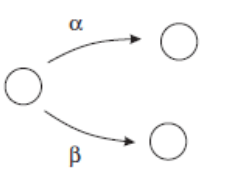




*   Embedded Markov chain(EMC), transition probabilities $p_{i,j}$
*   equilibrium probabilities $\pi_i$

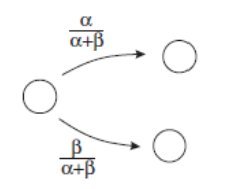
______________________________________________________________________


<b>slide #16: constructing a CTMC (model 1 : DTMC with Exponential Transition Times)</b>



*   For this DTMC (EMC) the steady state probability vector is π, the unique probability vector satisfying the equation

$\pi = \pi P$ (1)
*   Instead of having each transition take unit time, now we assume that the time required to make a transition from state i has an exponential distribution with rate $q_i$, and thus mean $\frac{1}{q_i}$, independent of the history before reaching state i.
_____________________________________________________________


<b>slide #17: constructing a CTMC (model 1 : DTMC with Exponential Transition Times)</b>



*   Relating the steady-state (stationary) probability vector $\tilde{π}$ of   the CTMC to steady state probability vector of DTMC (EMC) $\pi$

    $\tilde{\pi_j}=\frac{(\frac{\pi_j}{q_j})}{\sum_k \frac{\pi_k}{q_k}}$ (2) ($\frac{1}{𝑞_𝑗}$ is life time in state i slide 18 )

*  Indeed, this first modelling approach corresponds to treating the CTMC as a special case of a semi-Markov process (SMP)



*   We assume that there are no one-step transitions from any state to itself in the DTMC ( no self-loop); i.e., we assume that $P_{i,i} = 0$ for all i (we look at the chain at transitions)
*   this assumption is not critical,( see the third modelling)

_________________________________________________________________



<b>slide #18: constructing a CTMC (model 1 : DTMC with Exponential Transition Times)</b>

Markov processes have no self-loops and their state transitions are characterized by a generator matrix, which is analogous to a probability transition matrix. The classification of states have analogous statements for
Markov processes where the probability transition matrix is replaced by a generator matrix. The generator matrix of a Markov process, denoted by Q,
has entries that are the rates at which the process jumps from state to state. These entries are defined by

$q_{i,j} = \lim_{\tau \to 0}\frac{𝑃[𝑋(𝑡+𝜏 =𝑗)|𝑋(𝑡) =𝑖]}{\tau}  \ i \ne j$  (3)

______________________________________________________________________

<b>slide #19: constructing a CTMC (model 1 : DTMC with Exponential Transition Times)</b>

  (We assume that the Markov process is time homogeneous and thus that (3)  is
independent of t.)

The total rate out of state i is denoted by $q_i$ and equals
$q_i = \sum_{j \ne i}^{\infty} q_{i,j}$ (4)

The holding time of state i is exponentially distributed
with rate $q_i$.

By definition, we set the diagonal entries of Q equal to
minus the total rate,

$q_{i,j} =- q_i$ (5)

This implies that the row sums of matrix Q equal 0.
____________________________________________________________

<b>slide #20: constructing a CTMC (model 1 : DTMC with Exponential Transition Times)</b>



*   <b>stationary probabilities</b> in terms of the generator matrix.
Using the results of EMC in SMP(i.e. $\tilde{\pi_j} = \frac{\pi_j^e E[S_j]}{\sum_{k\in S} \pi_k^e E[S_k]} , i \in S$) 

 and multiplying (2) by $q_{ji}$ and summing yields [and using (5) $q_{ii} = -q_i$ and $\pi_i = \sum_{j \ne i} \pi_j P_{j,i}= \sum_{j \ne i} \pi_j \frac{q_{j,i}}{q_j}$ slide 12]

 $\sum_{j=0}^{\infty} \tilde{\pi}_j q_{ji} = \frac{\sum_{j=0}^{\infty}(\pi_jq_{ji} /q_j)}{\sum_k(\pi_k/q_k)} = \frac{\sum_{i \ne j}(\pi_jq_{ji}/q_i)+\pi_iq_{ii}/q_i}{\sum_k(\pi_k/q_k)} = \frac{\pi_i - \pi_i}{\sum_k(\pi_k/q_k)} = 0$  




*   Rewriting in matrix form, shows that the stationary probabilities of a Markov process satisfy $\tilde{\pi}Q = 0$, with the additional normalization requirement that $||\tilde{\pi}||=1$

_____________________________________________________________________



In [21]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

In [9]:
# generate sorjourn(holding) time according to exponential distribution.
def sample_from_rate(rate):
    if rate == 0:
        return float('inf')
    return random.expovariate(rate)

#simulate continuous time markove chain (method 1)
def simulate_cmc(Q, time, warm_up):
  # input:
  # Q : transition matrix
  # time : simulation time
    Q = list(Q)  
    state_space = range(len(Q))  # Index the state space
    time_spent = {s:0 for s in state_space}  # Set up a dictionary to keep track of time
    clock = 0  # Keep track of the clock
    current_state = 0  # First state
    while clock < time:
        # note: (slide16) Instead of having each transition take unit time, now we assume that the time required to make a transition from state i has 
        #an exponential distribution with rate qi
        sojourn_times = [sample_from_rate(rate) for rate in Q[current_state][:current_state]]  
        sojourn_times += [float('inf')]  # An infinite sojourn to the same state  # main digonal
        sojourn_times += [sample_from_rate(rate) for rate in Q[current_state][current_state + 1:]] 

        # Identify the next state. 
        #The policy to choose the next state is to choose the state with a minimum sojourn time.
        next_state = min(state_space, key=lambda x: sojourn_times[x])
        sojourn = sojourn_times[next_state]
        clock += sojourn
        if clock > warm_up:  # Keep track if past warm up time
            time_spent[current_state] += sojourn
        current_state = next_state  # Transition

    #slide 17: life time of spent time in state i divide by total spent time yield the probability
    pi = [time_spent[state] / sum(time_spent.values()) for state in state_space]  # Calculate probabilities: the 
    return pi

In [10]:
# transition matrix: ( the diagonal elements are negative as in Ctmc rate of staying in a state cause no change)
Q = [[-3, 2, 1, 4], [1, -5, 4, 3], [1, 8, -9,7],[3, 4, 2, -6]]
lst = list(range(0,len(Q)))

In [11]:
x = simulate_cmc(Q, 4000, 500)
x

[0.19877750469966607,
 0.34395037612814205,
 0.14306271070194715,
 0.31420940847024464]

<b>slide #21: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>



*  We look at the chain at any time ( so we need to define zero-time transition probabilities, $P_{i,i}(0) = 1$ since there is no instant jump from a state)
*   let $P(0) = I$, where I is the identity matrix; i.e., we
set $P_{i,i}(0) = 1$ for all i and we set $P_{i,j}(0) = 0$
whenever 𝑖 ≠ 𝑗.



*   We define $Q 	\equiv \lim_{h\downarrow0}\frac{p(h)-I}{h} = \lim_{h\downarrow0}\frac{p(h)-P(0)}{h} = p'(0+)\quad \text(it is rate)$

See Ross prob. Models 9th ed. ch 6 page 378

___________________________________________________________



<b>slide #22: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>



*   Thus the transition rate from state i to state j be defined in terms of the derivatives:

*   $Q_{ij} \equiv lim_{h ↓ 0} \frac{P_{i,j}(h) - P_{i,j}(0)}{h} = P'_{i,j}(0+)  = \frac{dP_{i,j(t)}}{dt}|_{t=0+}$

$Q_{ii} \equiv lim_{h ↓ 0} \frac{P_{i,i}(h) - P_{i,i}(0)}{h} = P'_{i,i}(0+)  = \frac{dP_{i,i(t)}}{dt}|_{t=0+}$



*   in most treatments of CTMC’s instead of above, it is common to assume that

$P_{i,j}(h) = Q_{i,j}h+o(h) \ as \ h↓0 \ if \ j \ne i$ (4) and

$P_{i,i}(h)-1 = Q_{i,i}h + o(h) \ as \ h↓0$ , (5)

_________________________________________________

<b>slide #23: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>



*   For finite state space, (for infinite state spaces under extra regularity conditions ),we have
*   $Q_{i,i} = \sum_{j,j \ne i}Q_{i,j}(t)$  (6)

    proof: since $P_{i,j}(t)$ sum over j to 1

    $\sum_{j=1}^N P_{i,j}(t)=1$ so $P_{i,i}(t)+\sum_{j=1,j \ne i} P_{i,j} =1 $

    $\sum_{j=1,j\ne i} P_{i,j}(t)=1-P_{i,i}(t)$

    Dividing by t and let $t→0$ we obtain (6)



*   and let 
    $-Q_{i,i}=q_i$  (7) for all i 

_______________________________________________________________




<b>slide #24: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>



*   Same as DTMC model that is specified via a transition probability matrix P, we can specify a CTMC model via the transition-rate matrix Q.
*   In specifying the transition-rate matrix Q, it suffices to specify the off-diagonal elements $Q_{i,j}$ for $i \ne j$ because the diagonal elements $Q_{i,i}$ are always defined by (6).



*    The off-diagonal elements are always nonnegative, whereas the diagonal elements are always negative.
*   Each row sum of Q is zero.

___________________________________________________________


<b>slide #25: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>



*   In fact, this approach to CTMC modelling is perhaps best related to modelling with ordinary differential equations,
*   We may use Chapman-Kolmogorov equations to find the transition probabilities $P_{i,j}(t)$ from the transition rates $Q_{i,j} \equiv P'_{i,j}(0+)$



*   To do this we use the two systems of ordinary differential equations (ODE’s) generated by the transition rates namely, Kolmogorov forward and backward ODE’s (defined next)

____________________________________________________________________



<b>slide #26: constructing a CTMC (model 2 : Transition Rates
and ODE’s)</b>

<b>Theorem 1.</b> (Kolmogorov forward and backward ODE’s) The transition probabilities satisfy both the Kolmogorov forward differential equations

$P'_{i,j}(t+h) = \sum_k P_{ik}(t)Q_{kj}(h)$ for all i,j (9)

in matrix notation is the matrix ODE

$P'(t) = P(t)Q$  (10)

and the Kolmogorov backward differential equations

$P'_{i,j}(h+t) = \sum_k Q_{i,k}(h)P_{k,j}(t)$ for all i,j (11)

in matrix notation is the matrix ODE

$P'(t) = QP(t)$ (12)
_________________________________________________________

<b>slide #27: constructing a CTMC (model 2 : Transition Rates and ODE’s)</b>


*   <b>proof:</b> We apply the Chapman-Kolmogorov equations to write

   $P(t+h)= P(t)P(h)$

    and then do an asymptotic analysis as $h ↓ 0$.

*   We subtract P(t) from both sides and divide by h, to get

    $\frac{P(t+h)-P(t)}{h}= P(t)\frac{P(h)-I}{h}$

    where I is the identity matrix

______________________________________________________________

<b>slide #28: constructing a CTMC (model 2 : Transition Rates and ODE’s)</b>



*   Recalling that I = P(0), we can let h↓0 to get the desired result (10)
*   To get the backward equation (12), we start with

    $P(t+h) = P(h+t) = P(h)P(t)$

    and reason in the same way

________________________________________________________________


<b>slide #29: constructing a CTMC (model 2 : Transition Rates and ODE’s)M/M/1 Queue</b>



*   <b>Example</b> (Transient Probabilities for the M/M/1 Queue)
*   Note that given that the initial state at time 0 was state i,

$P(X(t + h) = j + 1|X(t) = j) = λh + o(h)$
$P(X(t + h) = j - 1|X(t) = j) = μh + o(h)$
$P(X(t + h) = j|X(t) = j) = 1 - [λh + μh] + o(h)$



\begin{equation}
q(j,k) =
\begin{cases}
  λ, & \text{$k = j + 1$}\\    
  μ & \text{$k = j - 1 , j > 0$}\\    
  -[λ + μ] & \text{$k = j , j > 0$}\\    
  - λ & \text{$k = j , j = 0$}      
\end{cases}
\end{equation}
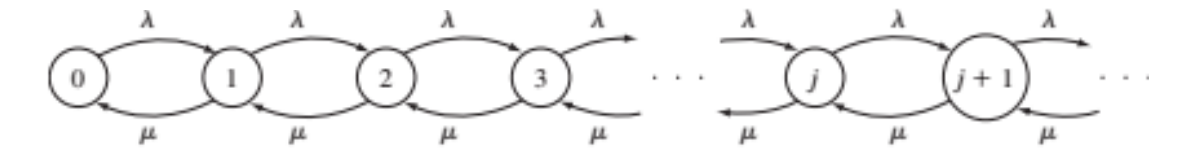

______________________________________________________

In [2]:
#M/M/c/k queue, with Markovian arrival and service distributions, c servers and a total capacity for K customers.
#https://vknight.org/blog/posts/continuous-time-markov-chains/
#With an arrival rate  λ and a service rate  μ then we can write down a matrix that essentially defines our chain:

In [3]:
#build a function that gives us a  Q for given parameters:

def get_transition_matrix(
    number_of_servers,
    total_capacity,
    arrival_rate,
    service_rate
):
    """
    Obtain Q for an M/M/c/K queue with given parameters:
    
    - number_of_servers: c
    - total_capacity: K
    - arrival_rate: lambda
    - service_rate: mu
    """
    Q = np.zeros((total_capacity + 1, total_capacity + 1))
    
    for i in range(total_capacity + 1):
        total_rate = 0
        
        if i < total_capacity:
            Q[i, i + 1] = arrival_rate
            total_rate += Q[i, i + 1]
        
        if i > 0:
            Q[i, i - 1] = min(i, number_of_servers) * service_rate
            total_rate += Q[i, i - 1]
        
        Q[i, i] = - total_rate
        
    return Q

In [7]:
Q = get_transition_matrix(number_of_servers=1, total_capacity=3, arrival_rate=1, service_rate=2)
Q

array([[-1.,  1.,  0.,  0.],
       [ 2., -3.,  1.,  0.],
       [ 0.,  2., -3.,  1.],
       [ 0.,  0.,  2., -2.]])

In [8]:
#check if given states are steady states:
def is_steady_state(state, Q):
    """
    Returns a boolean as to whether a given state is a steady 
    state of the Markov chain corresponding to the matrix Q
    """
    return np.allclose((state @ Q), 0)

state = np.array([1 / 4, 1 / 4, 1 / 4, 1 / 4])
assert not is_steady_state(state=state, Q=Q)

In [9]:
state = np.array([1 / 4, 1 / 4, 1 / 4, 1 / 4])
is_steady_state(state=state, Q=Q)

False

In [10]:
#Solving the defining differential equation numerically
# One approach to observing our system over time is to solve the defining differential equation numerically.

In [12]:
def obtain_steady_state_numerically(
    Q, 
    max_t=100, 
    number_of_timepoints=1000
):
    """
    Solve the defining differential equation until it converges.
    
    - Q: the transition matrix
    - max_t: the maximum time for which the differential equation is solved
    - number_of_time_points: the number of time points
    """
    
    def dx(x, t):
        return x @ Q
    
    dimension = Q.shape[0]
    state = np.ones(dimension) / dimension
    
    while not is_steady_state(state=state, Q=Q):
        ts = np.linspace(0, max_t, number_of_timepoints)
        xs = odeint(func=dx, y0=state, t=ts)
        state = xs[-1]
    
    return state

In [13]:
Q = get_transition_matrix(number_of_servers=2, total_capacity=3, arrival_rate=1, service_rate=2)
state = obtain_steady_state_numerically(Q=Q)

In [15]:
is_steady_state(state=state, Q=Q)

True

In [14]:
state

array([0.60377358, 0.30188679, 0.0754717 , 0.01886792])

<b>slide #30: constructing a CTMC (model 2 : Transition Rates and ODE’s) M/M/1 Queue</b>

$Pᵢ,ⱼ(t + Δt) = \sum_{k = 0}^{∞} Pᵢ,ₖ(Δt)Pₖ,ⱼ(t)$

$= \sum_{k \ne i}Pᵢ,ₖ(Δt)Pₖ,ⱼ(t) + Pᵢ,ᵢ(Δt)Pᵢ,ⱼ(t) $ 

$ \frac{P_i,_j(t + Δ t) - P_i,_j(t)}{Δ t} = \sum_{k \ne i} \frac{P_i,_k(Δ t)}{Δ t}P_k,_j(t) - \frac{1 - P_i,_i(Δ t)}{Δt}P_i,_j(t)$	

Thus we find chapman-Kolmogorov backward equation.

Nel page 379

$ \frac{dP_i,_j(t)}{dt} = \sum_{k \ne i}q_i,_k P_k,_j(t) - qᵢPᵢ,ⱼ(t) $.
________________________________________________________

<b>slide #31: constructing a CTMC (model 2 : Transition Rates and ODE’s) M/M/1 Queue</b>

*   <b>Example</b> (Transient Probabilities for the M/M/1 Queue)

*    Note that given that the initial state at time 0 was state i,
*    Writing the forward equation for the MIMl1 queue yields

*    $ \frac{dP_{i,0}(t)}{dt} = μP_{i,1} - λP_{i,0}(t) $

*    $ \frac{dP_{i,j}(t)}{dt} = μP_{i,j+1} + λP_{i,j-1}(t) - (λ + μ)P_{i,j}(t) $.
_________________________________________________

<b>slide #32: constructing a CTMC (model 2 : Transition Rates and ODE’s) M/M/1 Queue</b>

*   <b>Example</b> (Cntd.) The solution to these equations for 
this case is then given by

$ P_{i,j}(t) = e^{-(λ + μ)[ρ^{(j - i)/2}I_{j - i}(αt) + ρ^{(j - i - 1)/2}I_{j + i +1}(αt) + (1 - ρ)ρ^{j}\sum_{k=j+i+2}ρ^{-k/2}I_{k}(αt)]} $

*    where $ ρ = \frac{λ}{μ} $ and $α = 2μ\sqrt{ρ}$ and

*    $ Iₖ(x) = \sum_{m=0}^{∞} \frac{(x/2)^{k + 2m}}{(k + m)!m!} $    ,   k≥ -1

is the series expansion for the modified Bessel function of the first kind.
________________________________________________________

<b>slide #33: constructing a CTMC (model 2 : Transition Rates and ODE’s) M/M/1 Queue</b>

*    <b>Example (Cntd.)</b> It is difficult to have any intuition regarding the solution except for its limiting, and thus stationary, values.

*    (no need for normalization eq. since initial condition $P(0) =(0,…0, 
1,0,,…)$ being in state i at $t=0$ $(p_{ii}(0)=1) $is an extra equation) 

*     In the third term (i.e. coefficient $(1 − 𝜌)𝜌^𝑗)$ we see factors corresponding to the stationary distribution.


*     it must be $lim_{𝑡→∞}
 P_{i,j}(t) = (1 − 𝜌)𝜌^𝑗 $ independent of i.

*     The solution of transient probabilities suggests that :

*     $𝑙𝑖𝑚_{𝑡→∞} e^{−(λ + μ)} 𝜌^{(𝑗−i )/2}𝐼_{𝑗 − 𝑖} (𝛼𝑡) = 0$

*     $𝑙𝑖𝑚_{𝑡→∞} e^{−(λ + μ)} 𝜌^{(𝑗 − i -1 )/2}𝐼_{𝑗 + 𝑖 + 1} (𝛼𝑡) = 0$

*     $𝑙𝑖𝑚_{𝑡→∞} e^{−(λ + μ)}\sum_{𝑘=𝑗+𝑖+2} 𝜌^{−𝑘/2}𝐼_𝑘 (𝛼𝑡) = 1$

_______________________________________________________

<b>slide #34: constructing a CTMC (model 2 : Transition Rates and ODE’s)</b>

*    Equations (10 &12) are matrix ODE’s in t that can 
be similarly solved as the scalar ODE f’(t)=qf(t) 
and have matrix exponential solution.

*     (P(0) = I, the initial condition plays no role) In particular, as a consequence of Theorem 1, and If all entries of **Q** are bounded,(**Q** is said to be **uniform**: the name comes from uniformization of CTMC in model 4) we have the following Theorem2.

*     $Q_{i,j}=∞$ means instantaneous jump from state **I** **upon** entering this state

________________________________________________________

<b>slide #35: constructing a CTMC (model 2 : Transition Rates and ODE’s)</b>

*    **Theorem 2**. (matrix exponential 
representation) The transition function can be expressed as a matrix-exponential function of the rate matrix Q, i.e.,

$P(t) = e^{Qt}=\sum_{n = 0}^{∞} \frac{𝑄^𝑛𝑡^𝑛}{𝑛!} $  (13)

This matrix exponential is the unique solution to the two ODE’s with initial condition P(0) = I.

________________________________________________

<b>slide #36: constructing a CTMC (model 2 : Transition Rates and ODE’s)</b>

*    Proof: If we verify or assume that we can interchange summation and differentiation in (13), we can check that the displayed matrix exponential satisfies the two ODE’s

$P'(t) = \frac{d}{dt}\sum_{n = 0}^{∞} \frac{𝑄^𝑛𝑡^𝑛}{𝑛!} =  \sum_{n = 0}^{∞} \frac{d}{dt}\frac{𝑄^𝑛𝑡^𝑛}{𝑛!}$

$ = \sum_{n = 0}^{∞} \frac{n𝑄^𝑛𝑡^{𝑛-1}}{𝑛!} = Q \sum_{n = 0}^{∞}\frac{𝑄^𝑛𝑡^𝑛}{𝑛!} = Qe^{Qt} $

Note: limiting prob of ctmc(ross , $9^{th}$ , page 384)
____________________________________________

**slide #37: Summary of some Models of Markov Processes**

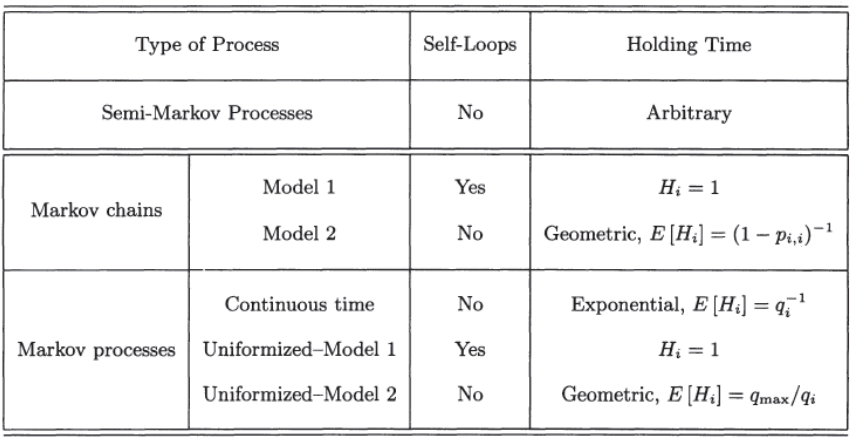

## Example: Definition of a CTMC
Consider a CTMC with three states: 0, 1, and 2. The transition rates between states are as follows:
- From state 0 to state 1: rate 2
- From state 1 to state 2: rate 3
- From state 2 to state 0: rate 1

This can be represented by the following transition rate matrix Q:

 Q = 
[-2 & 2 & 0 \
0 & -3 & 3 \
1 & 0 & -1]


## Example: Transition Probabilities Functions

Using the CTMC defined above, we compute the transition probability matrix function \( P(t) \) at a specific time \( t \). For simplicity, consider \( t = 1 \).

Given the transition rate matrix \( Q \), we can compute \( P(t) \) using the matrix exponential:

\[ P(t) = e^{Qt} \]



In [26]:
from scipy.linalg import expm

Q = np.array([[-2, 2, 0],
              [0, -3, 3],
              [1, 0, -1]])

P_t = expm(Q * 1)
P_t


array([[0.28469636, 0.23098702, 0.48431661],
       [0.24215831, 0.16920285, 0.58863884],
       [0.27693238, 0.16143887, 0.56162875]])

## Example: Chapman-Kolmogorov Equations

Consider the CTMC defined earlier with transition rate matrix \( Q \):

 Q = [
-2 & 2 & 0 \
0 & -3 & 3 \
1 & 0 & -1]


To demonstrate the Chapman-Kolmogorov equations, we compute the transition probability matrix \( P(t) \) at different times and verify the equation:

\[ P(s + t) = P(s)P(t) \]

Let's choose \( s = 1 \) and \( t = 1 \), then we will compute \( P(2) \) and compare it with \( P(1)P(1) \).

In [32]:

Q = np.array([[-2, 2, 0],
              [0, -3, 3],
              [1, 0, -1]])


P_1 = expm(Q * 1)


P_2 = expm(Q * 2)


P_1_dot_P_1 = np.dot(P_1, P_1)
print("p(2)=")
print(P_2)
print("p(1)p(1)=")
print(P_1_dot_P_1)

p(2)=
[[0.2711104  0.18303236 0.54585724]
 [0.27292862 0.17959422 0.54747716]
 [0.27346859 0.18195241 0.54457899]]
p(1)p(1)=
[[0.2711104  0.18303236 0.54585724]
 [0.27292862 0.17959422 0.54747716]
 [0.27346859 0.18195241 0.54457899]]
